# 2023 Overall Ranking Data Analysis 

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import networkx as nx

In [4]:
# import csv file
df = pd.read_csv('2023OA.csv', encoding= 'unicode_escape')

# to avoid encoding errors ,use 'unicode_escape'

In [5]:
df.head()

,ï»¿Institute ID,Name,City,State,Score,Rank,Year
0,IR-O-U-0456,Indian Institute of Technology Madras,Chennai,Tamil Nadu,86.69,1,2023
1,IR-O-U-0220,Indian Institute of Science,Bengaluru,Karnataka,83.09,2,2023
2,IR-O-I-1074,Indian Institute of Technology Delhi,New Delhi,Delhi,82.16,3,2023
3,IR-O-U-0306,Indian Institute of Technology Bombay,Mumbai,Maharashtra,81.28,4,2023
4,IR-O-I-1075,Indian Institute of Technology Kanpur,Kanpur,Uttar Pradesh,77.23,5,2023


In [6]:
df.tail()

,ï»¿Institute ID,Name,City,State,Score,Rank,Year
95,IR-O-U-0318,Mumbai University,Mumbai,Maharashtra,45.86,96,2023
96,IR-O-U-0389,Banasthali Vidyapith,Banasthali,Rajasthan,45.85,97,2023
97,IR-O-I-1486,Sri Ramachandra Institute of Higher Education ...,Chennai,Tamil Nadu,45.84,98,2023
98,IR-O-S-8972,Indian Institute of Management Calcutta,Kolkata,West Bengal,45.74,99,2023
99,IR-O-U-0217,Christ University,Bengaluru,Karnataka,45.65,100,2023


In [3]:
state_counts = df['State'].value_counts()
print(state_counts)



State
Tamil Nadu           18
Maharashtra          11
Uttar Pradesh         8
Punjab                8
Delhi                 7
West Bengal           7
Karnataka             7
Rajasthan             4
Kerala                4
Odisha                4
Telangana             4
Uttarakhand           4
Gujarat               2
Madhya Pradesh        2
Assam                 2
Andhra Pradesh        2
Pondicherry           1
Jharkhand             1
Chandigarh            1
Jammu and Kashmir     1
Bihar                 1
Himachal Pradesh      1
Name: count, dtype: int64


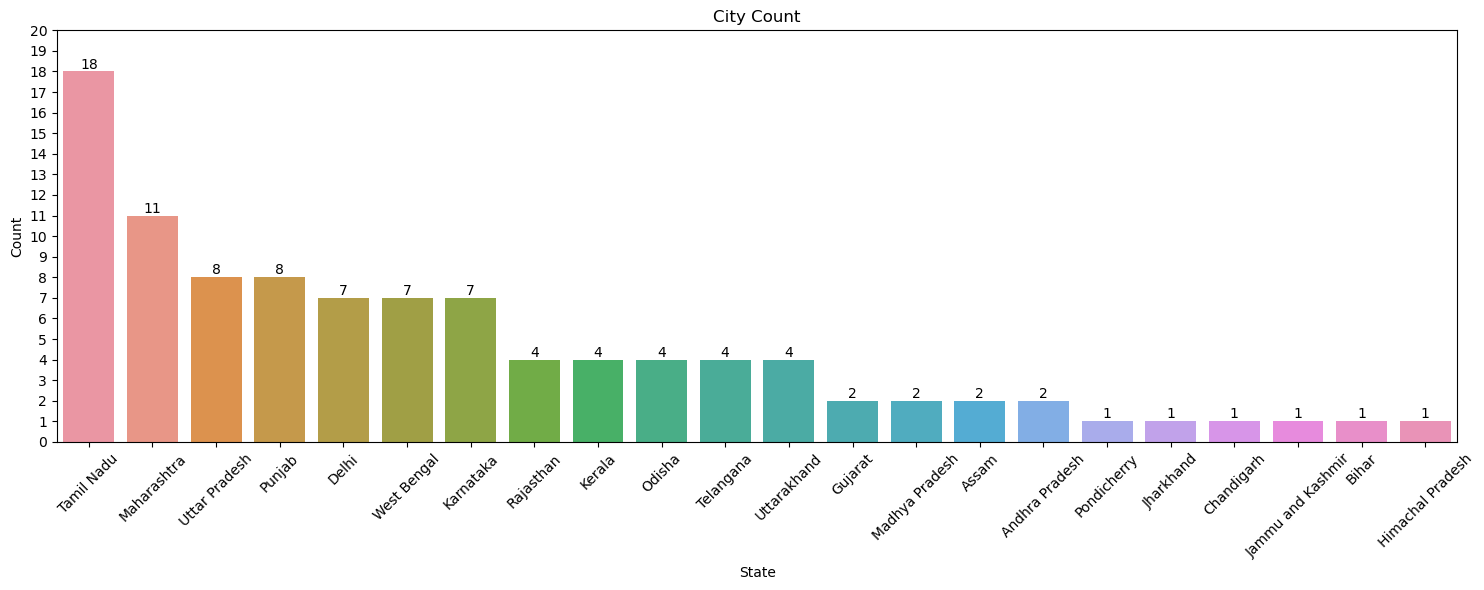

In [7]:
state_counts = df['State'].value_counts()

# Plot the state counts
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=state_counts.index, y=state_counts.values)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('City Count')

# Set y-axis ticks from 0 to 20
plt.yticks(range(21))

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [14]:
# Group by state and count city occurrences
city_counts_by_state = df.groupby(['State', 'City']).size().reset_index(name='Count')

# Print the city counts by state
print("City counts by state:")
current_state = None
for state, city, count in zip(city_counts_by_state['State'], city_counts_by_state['City'], city_counts_by_state['Count']):
    if current_state != state:
        if current_state:
            print(f"Total count for {current_state}: {total_count}\n")
        current_state = state
        total_count = 0
        print(f"State: {state}")
    print(f"  City: {city}, Count: {count}")
    total_count += count

# Print the total count for the last state
print(f"Total count for {current_state}: {total_count}")

City counts by state:
State: Andhra Pradesh
  City: Vaddeswaram, Count: 1
  City: Visakhapatnam, Count: 1
Total count for Andhra Pradesh: 2

State: Assam
  City: Guwahati, Count: 1
  City: Silchar, Count: 1
Total count for Assam: 2

State: Bihar
  City: Patna, Count: 1
Total count for Bihar: 1

State: Chandigarh
  City: Chandigarh, Count: 1
Total count for Chandigarh: 1

State: Delhi
  City: Delhi, Count: 1
  City: New Delhi, Count: 6
Total count for Delhi: 7

State: Gujarat
  City: Ahmedabad, Count: 1
  City: Gandhinagar, Count: 1
Total count for Gujarat: 2

State: Himachal Pradesh
  City: Mandi, Count: 1
Total count for Himachal Pradesh: 1

State: Jammu and Kashmir
  City: Srinagar, Count: 1
Total count for Jammu and Kashmir: 1

State: Jharkhand
  City: Dhanbad, Count: 1
Total count for Jharkhand: 1

State: Karnataka
  City: Belgaum, Count: 1
  City: Bengaluru, Count: 2
  City: Manipal, Count: 1
  City: Mysuru, Count: 2
  City: Surathkal, Count: 1
Total count for Karnataka: 7

State:

In [7]:
df.columns

Index(['ï»¿Institute ID', 'Name', 'City', 'State', 'Score', 'Rank'], dtype='object')

In [8]:


# Read the CSV file into a DataFrame
df = pd.read_csv('2023OA.csv')  

# Create a dictionary mapping college name to rank, city, state, and score
college_to_details = df.set_index('Name')[['Rank', 'City', 'State', 'Score']].to_dict(orient='index')

# Function to get rank, city, state, and score based on college name
def get_college_details(college_name):
    return college_to_details.get(college_name, 'Details not found for this college')

# Get user input for the college name
college_name = input('Enter a college name: ')

# Get rank, city, state, and score based on the college name
college_details = get_college_details(college_name)

# Print the details
if college_details != 'Details not found for this college':
    print(f'College: {college_name}')
    print(f'Rank: {college_details["Rank"]}')
    print(f'City: {college_details["City"]}')
    print(f'State: {college_details["State"]}')
    print(f'Score: {college_details["Score"]}')
else:
    print('College not found in top 100 ranking.')



Enter a college name: j
College not found in top 100 ranking.


In [10]:


# Read the CSV file into a DataFrame
df = pd.read_csv('2023OA.csv')  

# Convert the DataFrame into a dictionary
name_to_rank = df.set_index('Name')['Rank'].to_dict()

# Print the dictionary (optional)
print(name_to_rank)


{'Indian Institute of Technology Madras': 1, 'Indian Institute of Science': 2, 'Indian Institute of Technology Delhi': 3, 'Indian Institute of Technology Bombay': 4, 'Indian Institute of Technology Kanpur': 5, 'All India Institute of Medical Sciences, Delhi': 6, 'Indian Institute of Technology Kharagpur': 7, 'Indian Institute of Technology Roorkee': 8, 'Indian Institute of Technology Guwahati': 9, 'Jawaharlal Nehru University': 10, 'Banaras Hindu University': 11, 'Jamia Millia Islamia,New Delhi': 12, 'Jadavpur University': 13, 'Indian Institute of Technology Hyderabad': 14, 'Amrita Vishwa Vidyapeetham': 15, 'Manipal Academy of Higher Education-Manipal': 16, 'Vellore Institute of Technology': 17, 'Anna University': 18, 'Aligarh Muslim University': 19, 'University of Hyderabad': 20, 'National Institute of Technology Tiruchirappalli': 21, 'University of Delhi': 22, 'Calcutta University': 23, 'Indian Institute of Technology Gandhinagar': 24, 'Birla Institute of Technology & Science -Pilani

In [11]:


# Read the CSV file into a DataFrame
df = pd.read_csv('2023OA.csv')  

# Create a dictionary mapping rank to college information
rank_to_college_info = {}
for _, row in df.iterrows():
    rank = row['Rank']
    college_info = {
        'Name': row['Name'],
        'Score': row['Score'],
        'State': row['State'],
        'City': row['City']
    }
    if rank in rank_to_college_info:
        rank_to_college_info[rank].append(college_info)
    else:
        rank_to_college_info[rank] = [college_info]

# Function to get college information based on rank
def get_college_info(rank):
    return rank_to_college_info.get(rank, [{'Name': 'College not found for this rank'}])

# Get user input for the rank
try:
    rank = int(input('Enter a rank (1-100): '))
    if 1 <= rank <= 100:
        college_info_list = get_college_info(rank)
        print(f'Information for rank {rank}:')
        for college_info in college_info_list:
            print('College Name:', college_info['Name'])
            print('Score:', college_info['Score'])
            print('State:', college_info['State'])
            print('City:', college_info['City'])
            print('-' * 30)
    else:
        print('Please enter a valid rank between 1 and 100.')
except ValueError:
    print('Please enter a valid integer rank.')


Enter a rank (1-100): 5
Information for rank 5:
College Name: Indian Institute of Technology Kanpur
Score: 77.23
State: Uttar Pradesh
City: Kanpur
------------------------------


In [13]:


# Read the CSV file into a DataFrame
df = pd.read_csv('2023OA.csv') 

# Function to get college details (name, rank, state, score) based on city name
def get_college_details(city_name):
    city_details = df[df['City'] == city_name]
    if not city_details.empty:
        return city_details[['Name', 'Rank', 'State', 'Score']].values.tolist()
    else:
        return 'No colleges found in this city.'

# Get user input for the city name
city_name = input('Enter a city name: ')

# Get college details (name, rank, state, score) based on the city name
college_details = get_college_details(city_name)

# Print the details
if college_details != 'No colleges found in this city.':
    print(f'Colleges in {city_name}:')
    for college in college_details:
        college_name, rank, state, score = college
        print(f'College: {college_name}')
        print(f'Rank: {rank}')
        print(f'State: {state}')
        print(f'Score: {score}')  # Print the score for each college
        print('-' * 30)
else:
    print('No colleges found in the entered city. Please enter a valid city name.')


Enter a city name: d
No colleges found in the entered city. Please enter a valid city name.


In [14]:


# Read the CSV file into a DataFrame
df = pd.read_csv('2023OA.csv') 

# Function to get institute details (name, score, city, rank) based on state name
def get_institute_details(state_name):
    state_details = df[df['State'] == state_name]
    if not state_details.empty:
        return state_details[['Name', 'Score', 'City', 'Rank']].values.tolist()
    else:
        return 'No institutes found in this state.'

# Get user input for the state name
state_name = input('Enter a state name: ')

# Get institute details (name, score, city, rank) based on the state name
institute_details = get_institute_details(state_name)

# Print the details
if institute_details != 'No institutes found in this state.':
    print(f'Institutes in {state_name}:')
    for institute in institute_details:
        institute_name, score, city, rank = institute
        print(f'Institute: {institute_name}')
        print(f'Score: {score}')
        print(f'City: {city}')
        print(f'Rank: {rank}')
        print('-' * 30)
else:
    print('No institutes found in the entered state. Please enter a valid state name.')


Enter a state name: Mumbai
No institutes found in the entered state. Please enter a valid state name.


Enter a rank (1-100): 66


C:\Users\utkar\AppData\Local\Temp\ipykernel_15320\2033830014.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


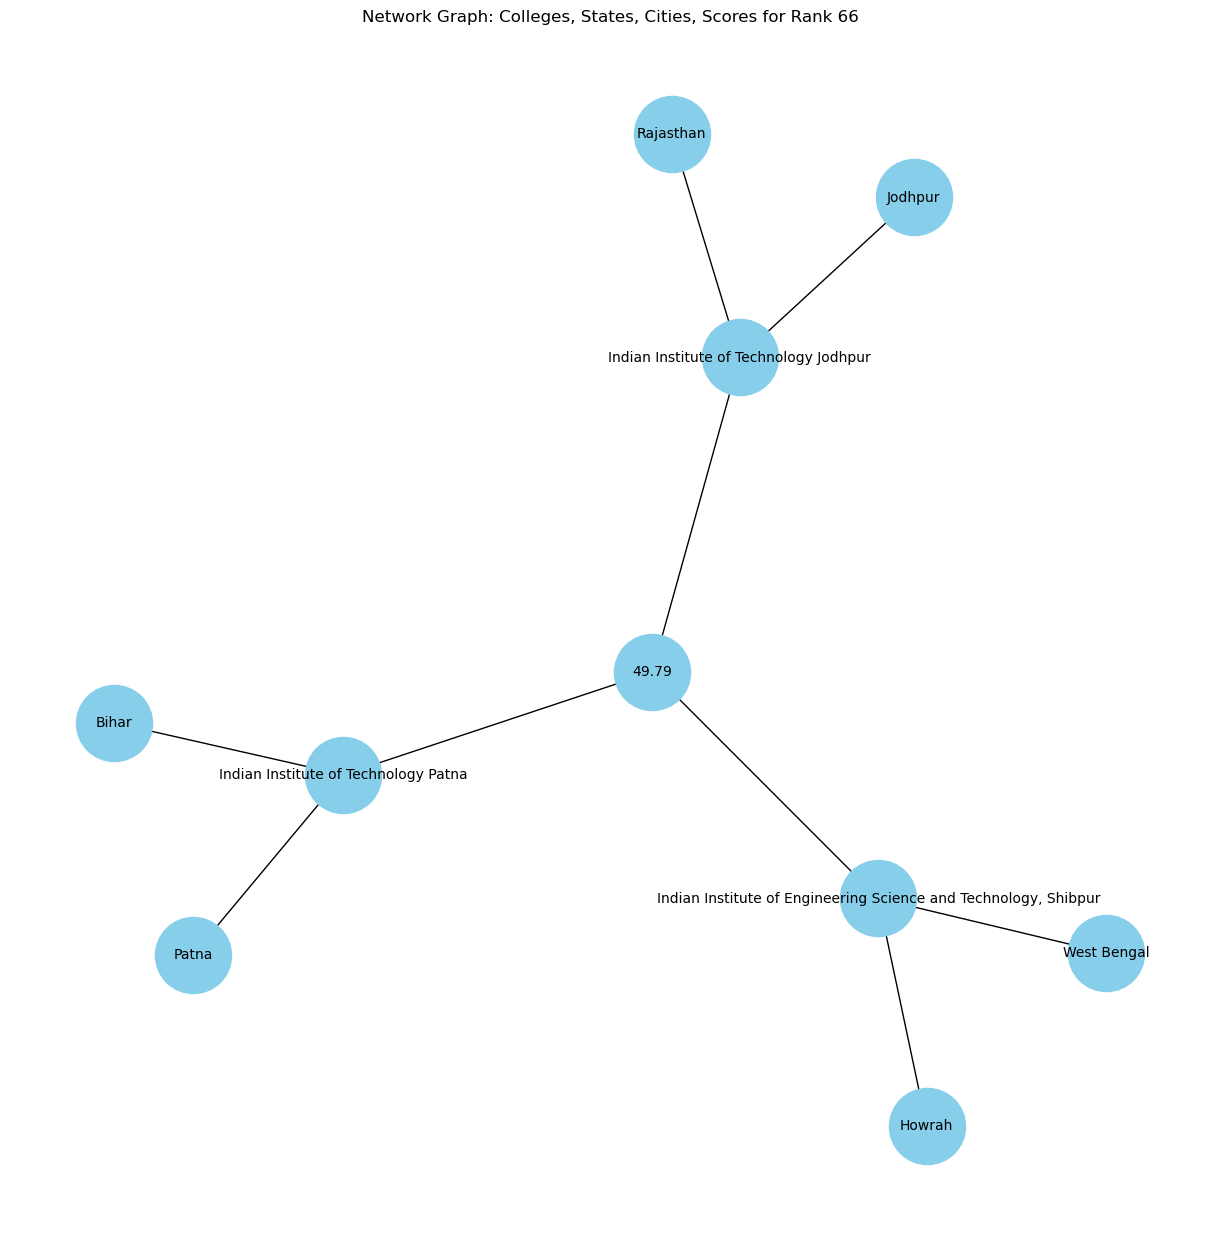

In [15]:




# Read the CSV file into a DataFrame
df = pd.read_csv('2023OA.csv')  

# Function to create a network graph based on a given rank
def create_network_graph(rank):
    G = nx.Graph()

    # Get colleges for the given rank
    colleges = df[df['Rank'] == rank]

    if not colleges.empty:
        for _, row in colleges.iterrows():
            college_name = row['Name']
            score = row['Score']
            city = row['City']
            state = row['State']

            # Add the college as a node with its attributes
            G.add_node(college_name, rank=rank, score=score, city=city, state=state)

            # Add nodes for state, city, and score
            G.add_node(state, label='State')
            G.add_node(city, label='City')
            G.add_node(score, label='Score')

            # Add edges between college and its attributes
            G.add_edge(college_name, score)
            G.add_edge(college_name, city)
            G.add_edge(college_name, state)

    return G

# Get user input for the rank
try:
    rank = int(input('Enter a rank (1-100): '))
    if 1 <= rank <= 100:
        # Create the network graph for the specified rank
        G = create_network_graph(rank)

        # Plot the network graph
        plt.figure(figsize=(12, 12))
        pos = nx.spring_layout(G, seed=42)  # Layout algorithm for the graph
        nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10)

        # Get labels for nodes
        labels = {node: node if node in G.nodes() else '' for node in G.nodes()}

        plt.title(f'Network Graph: Colleges, States, Cities, Scores for Rank {rank}')
        plt.tight_layout()
        plt.show()
    else:
        print('Please enter a valid rank between 1 and 100.')
except ValueError:
    print('Please enter a valid integer rank.')


# 2017-23 Overall ranking Data Analysis

In [16]:
# List of CSV file paths
csv_files = ['2017OA.csv', '2018OA.csv', '2019OA.csv','2020OA.csv', '2021OA.csv', '2022OA.csv', '2023OA.csv']  # Add your file paths here

# Create an empty list to store DataFrames
dfs = []

# Read each CSV file and append its DataFrame to the list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
print(combined_df)

       Institute ID                                               Name   
0    IR17-I-2-18243              Indian Institute of Science Bangalore  \
1     IR17-I-1-1-77              Indian Institute of Technology Madras   
2    IR17-I-2-18633              Indian Institute of Technology Bombay   
3    IR17-I-2-18630           Indian Institute of Technology Kharagpur   
4     IR17-I-2-1-79               Indian Institute of Technology Delhi   
..              ...                                                ...   
695     IR-O-U-0318                                  Mumbai University   
696     IR-O-U-0389                               Banasthali Vidyapith   
697     IR-O-I-1486  Sri Ramachandra Institute of Higher Education ...   
698     IR-O-S-8972            Indian Institute of Management Calcutta   
699     IR-O-U-0217                                  Christ University   

           City        State  Score  Rank  Year  
0     Bengaluru    Karnataka  83.28     1  2017  
1       Che

In [17]:
combined_df.to_csv('combined_data.csv', index=False)

In [18]:
# import csv file
df = pd.read_csv('combined_data.csv', encoding= 'unicode_escape')

# to avoid encoding errors ,use 'unicode_escape'

In [19]:
df.head()

,Institute ID,Name,City,State,Score,Rank,Year
0,IR17-I-2-18243,Indian Institute of Science Bangalore,Bengaluru,Karnataka,83.28,1,2017
1,IR17-I-1-1-77,Indian Institute of Technology Madras,Chennai,Tamil Nadu,73.97,2,2017
2,IR17-I-2-18633,Indian Institute of Technology Bombay,Mumbai,Maharashtra,71.78,3,2017
3,IR17-I-2-18630,Indian Institute of Technology Kharagpur,Kharagpur,West Bengal,68.43,4,2017
4,IR17-I-2-1-79,Indian Institute of Technology Delhi,New Delhi,Delhi,64.18,5,2017


In [20]:
state_counts = df['State'].value_counts()
print(state_counts)


State
Tamil Nadu           136
Maharashtra           79
Uttar Pradesh         54
West Bengal           49
Delhi                 46
Karnataka             45
Punjab                40
Kerala                29
Telangana             29
Odisha                28
Assam                 23
Rajasthan             22
Andhra Pradesh        19
Gujarat               15
Uttarakhand           14
Madhya Pradesh        12
Jharkhand             10
Jammu and Kashmir      9
Pondicherry            8
Himachal Pradesh       7
Chandigarh             7
Bihar                  7
Meghalaya              6
Haryana                3
Mizoram                2
Goa                    1
Name: count, dtype: int64


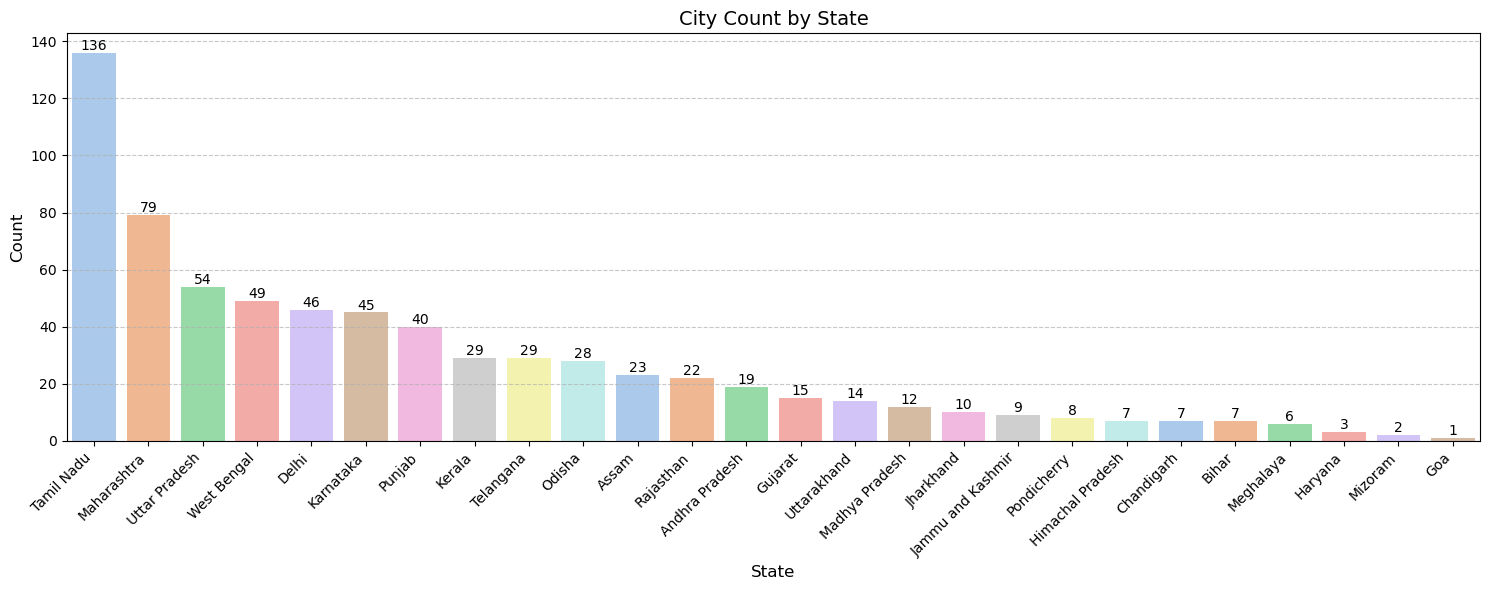

In [21]:
state_counts = df['State'].value_counts()

# Set a custom color palette
custom_colors = sns.color_palette('pastel')[0:len(state_counts)]

# Plot the state counts with a bar plot
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=state_counts.index, y=state_counts.values, palette=custom_colors)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('City Count by State', fontsize=14)

# Annotate the bars with counts
for i, p in enumerate(ax.patches):
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Set y-axis ticks based on the maximum count
max_count = state_counts.max()
plt.yticks(range(0, max_count+20, 20))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add grid lines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of annotations
plt.tight_layout()

# Show the plot
plt.show()


In [22]:
# Group by state, year, and count city occurrences
city_counts_by_state_year = df.groupby(['State', 'Year', 'City']).size().reset_index(name='Count')

# Print the city counts by state and year
print("City counts by state and year:")
current_state = None
current_year = None
for state, year, city, count in zip(city_counts_by_state_year['State'], city_counts_by_state_year['Year'], city_counts_by_state_year['City'], city_counts_by_state_year['Count']):
    if current_state != state or current_year != year:
        if current_state and current_year:
            print(f"Total count for {current_state} ({current_year}): {total_count}\n")
        current_state = state
        current_year = year
        total_count = 0
        print(f"State: {state}, Year: {year}")
    print(f"  City: {city}, Count: {count}")
    total_count += count

# Print the total count for the last state and year
print(f"Total count for {current_state} ({current_year}): {total_count}")

City counts by state and year:
State: Andhra Pradesh, Year: 2017
  City: Tirupati, Count: 1
  City: Visakhapatnam, Count: 1
Total count for Andhra Pradesh (2017): 2

State: Andhra Pradesh, Year: 2018
  City: Tirupati, Count: 2
  City: Vaddeswaram, Count: 1
  City: Visakhapatnam, Count: 1
Total count for Andhra Pradesh (2018): 4

State: Andhra Pradesh, Year: 2019
  City: Tirupati, Count: 1
  City: Vaddeswaram, Count: 1
  City: Visakhapatnam, Count: 1
Total count for Andhra Pradesh (2019): 3

State: Andhra Pradesh, Year: 2020
  City: Tirupati, Count: 1
  City: Vaddeswaram, Count: 1
  City: Visakhapatnam, Count: 1
Total count for Andhra Pradesh (2020): 3

State: Andhra Pradesh, Year: 2021
  City: Tirupati, Count: 1
  City: Vaddeswaram, Count: 1
  City: Visakhapatnam, Count: 1
Total count for Andhra Pradesh (2021): 3

State: Andhra Pradesh, Year: 2022
  City: Vaddeswaram, Count: 1
  City: Visakhapatnam, Count: 1
Total count for Andhra Pradesh (2022): 2

State: Andhra Pradesh, Year: 2023
  

In [24]:
# Read the CSV file into a DataFrame
df = pd.read_csv('combined_data.csv')

# Function to get score, city, state, and college name based on rank and year
def get_college_details_by_rank_and_year(rank, year):
    filtered_data = df[(df['Rank'] == rank) & (df['Year'] == year)]
    if not filtered_data.empty:
        college_name = filtered_data['Name'].values[0]
        city = filtered_data['City'].values[0]
        state = filtered_data['State'].values[0]
        score = filtered_data['Score'].values[0]
        return {'College Name': college_name, 'City': city, 'State': state, 'Score': score}
    else:
        return 'No data found for the specified rank and year.'

# Get user input for rank and year
rank = int(input('Enter a rank: '))
year = int(input('Enter a year: '))

# Get score, city, state, and college name based on rank and year
college_details = get_college_details_by_rank_and_year(rank, year)

# Print the details
if college_details != 'No data found for the specified rank and year.':
    print(f'Rank: {rank}')
    print(f'Year: {year}')
    print(f'College Name: {college_details["College Name"]}')
    print(f'City: {college_details["City"]}')
    print(f'State: {college_details["State"]}')
    print(f'Score: {college_details["Score"]}')
else:
    print('No data found for the specified rank and year.')


Enter a rank: 2
Enter a year: 2020
Rank: 2
Year: 2020
College Name: Indian Institute of Science
City: Bengaluru
State: Karnataka
Score: 84.18


In [26]:
# Function to get score, city, state, and college name based on rank for all years
def get_college_details_by_rank(rank):
    filtered_data = df[df['Rank'] == rank]
    details_list = []
    if not filtered_data.empty:
        for _, row in filtered_data.iterrows():
            college_name = row['Name']
            city = row['City']
            state = row['State']
            score = row['Score']
            year = row['Year']
            details_list.append({
                'Year': year,
                'College Name': college_name,
                'City': city,
                'State': state,
                'Score': score
            })
        return details_list
    else:
        return 'No data found for the specified rank.'

# Get user input for rank
rank = int(input('Enter a rank: '))

# Get score, city, state, and college name based on rank for all years
college_details_list = get_college_details_by_rank(rank)

# Print the details for each year
if college_details_list != 'No data found for the specified rank.':
    print(f'Details for Rank {rank}:')
    for details in college_details_list:
        print(f'Year: {details["Year"]}')
        print(f'College Name: {details["College Name"]}')
        print(f'City: {details["City"]}')
        print(f'State: {details["State"]}')
        print(f'Score: {details["Score"]}\n')
else:
    print('No data found for the specified rank.')


Enter a rank: 66
Details for Rank 66:
Year: 2017
College Name: Indian Institute of Technology Bhubaneswar 
City: Bhubaneswar
State: Odisha
Score: 41.75

Year: 2018
College Name: Birla Institute of Technology 
City: Ranchi
State: Jharkhand
Score: 44.71

Year: 2019
College Name: Indian Institute of Science Education & Research Mohali
City: Mohali
State: Punjab
Score: 45.43

Year: 2020
College Name: Saveetha Institute of Medical and Technical Sciences
City: Chennai
State: Tamil Nadu
Score: 46.81

Year: 2021
College Name: Banasthali Vidyapith
City: Banasthali
State: Rajasthan
Score: 45.89

Year: 2022
College Name: Indian Institute of Engineering Science and Technology, Shibpur
City: Howrah
State: West Bengal
Score: 48.45

Year: 2023
College Name: Indian Institute of Engineering Science and Technology, Shibpur
City: Howrah
State: West Bengal
Score: 49.79

Year: 2023
College Name: Indian Institute of Technology Jodhpur
City: Jodhpur
State: Rajasthan
Score: 49.79

Year: 2023
College Name: Ind